In [13]:
# Install fastbook
%pip install -Uqq fastbook

Mounted at /content/drive
Totale afbeeldingen gevonden: 51
/content/drive/My Drive/Screenshots/d/d1.png
/content/drive/My Drive/Screenshots/d/d2.png
/content/drive/My Drive/Screenshots/d/d3.png
/content/drive/My Drive/Screenshots/d/d4.png
/content/drive/My Drive/Screenshots/d/d5.png
/content/drive/My Drive/Screenshots/d/d6.png
/content/drive/My Drive/Screenshots/d/d7.png
/content/drive/My Drive/Screenshots/d/d8.png
/content/drive/My Drive/Screenshots/d/d9.png
/content/drive/My Drive/Screenshots/d/d10.png
/content/drive/My Drive/Screenshots/d/d11.png
/content/drive/My Drive/Screenshots/d/d12.png
/content/drive/My Drive/Screenshots/d/d13.png
/content/drive/My Drive/Screenshots/d/d14.png
/content/drive/My Drive/Screenshots/d/d15.png
/content/drive/My Drive/Screenshots/d/d16.png
/content/drive/My Drive/Screenshots/d/d17.png
/content/drive/My Drive/Screenshots/q/q1.png
/content/drive/My Drive/Screenshots/q/q2.png
/content/drive/My Drive/Screenshots/q/q3.png
/content/drive/My Drive/Screensho

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:02<00:00, 49.0MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,nan,9.771172,0.600000,00:05


/usr/local/lib/python3.10/dist-packages/fastprogress/fastprogress.py:73: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,error_rate,time
0,nan,9.771172,0.600000,00:05
1,nan,9.771172,0.600000,00:06
2,nan,9.771172,0.600000,00:04


('d', tensor(0), tensor([9.9995e-01, 5.1299e-05, 3.1624e-07]))


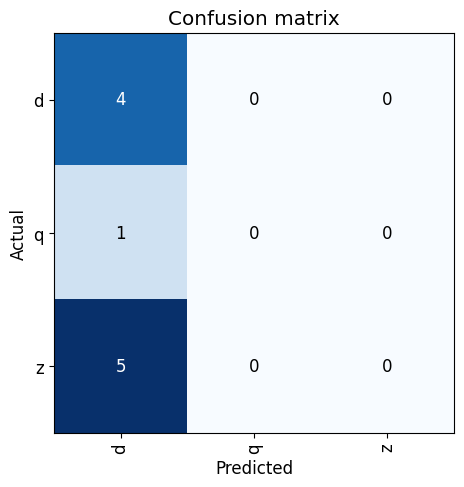

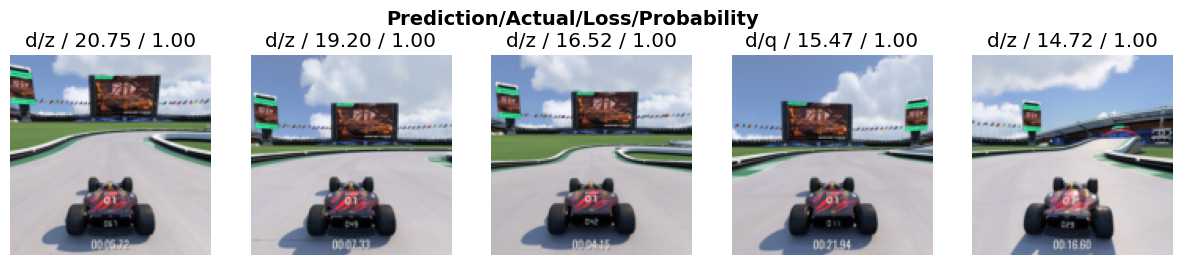

In [21]:
# Importeer de nodige bibliotheken
import fastbook
from fastai.vision.all import *
from fastai.vision.widgets import *
from google.colab import drive

# Monteer Google Drive
drive.mount('/content/drive', force_remount=True)  # Zorg ervoor dat Drive is gemonteerd

# Definieer het pad naar je afbeeldingen
path = Path('/content/drive/My Drive/Screenshots/')  # Hoofdpad naar de afbeeldingen

# Lijst van afbeeldingsbestanden
filenames = get_image_files(path)
print(f"Totale afbeeldingen gevonden: {len(filenames)}")

# Controleer of de afbeeldingen correct worden gelezen
for filename in filenames:
    print(filename)  # Print de bestandsnamen om te controleren of ze correct worden geladen

# Verifieer de afbeeldingen
failed = verify_images(filenames)
print(f"Mislukte afbeeldingen: {failed}")

# Aangepaste labelfunctie om labels uit de mapnamen te halen
def label_func(fname):
    return fname.parent.name  # Dit haalt de mapnaam op als label

# Maak DataLoaders aan met behulp van een DataBlock
customDataset = DataBlock(
    blocks=(ImageBlock, CategoryBlock),  # Geef afbeeldings- en categoriale types op
    get_items=get_image_files,            # Functie om alle afbeeldingsbestanden te krijgen
    splitter=RandomSplitter(valid_pct=0.2, seed=42),  # Splits data in train- en validatiesets
    get_y=label_func,                     # Gebruik de labelfunctie die hierboven is gedefinieerd
    item_tfms=Resize(128)                 # Wijzig de grootte van afbeeldingen naar 128x128
)

# Laad de DataLoaders
dls = customDataset.dataloaders(path)

# Controleer of DataLoaders correct zijn aangemaakt
print(f"Aantal trainingsbatches: {len(dls.train)}")
print(f"Aantal validatiebatches: {len(dls.valid)}")

# Snelle controle van de data
if len(dls.train) > 0:
    dls.train.show_batch(max_n=4, nrows=1)
else:
    print("Geen trainingsbatches beschikbaar.")

# Maak een convolutioneel neuraal netwerk aan met behulp van transfer learning
our_out_of_the_box_model = vision_learner(dls, resnet50, metrics=error_rate)
our_out_of_the_box_model.fine_tune(3)

# Interpretatie van de resultaten
interp = ClassificationInterpretation.from_learner(our_out_of_the_box_model)
interp.plot_confusion_matrix()
interp.plot_top_losses(5, nrows=1)

# Opslaan van het model
our_out_of_the_box_model.save('first_model')
our_out_of_the_box_model.export()

# **Model laden & inferentie:**
our_out_of_the_box_model_inference = load_learner('export.pkl')

# Test het model op een afbeelding
predictions = our_out_of_the_box_model_inference.predict(path / 'q/q1.png')  # Voorbeeld voor de map 'q'
print(predictions)
